# Scholar Data Preparation & Storing

In [3]:
# importing necessary libraries
import pandas as pd
import mysql.connector # to connect to MySQL DB 
from sqlalchemy import create_engine # to create db connection engine
import ast # used to convert literal strings to list e.g. str = "['sfa2','afag3']" => list = ['sfa2','afag3']

In [4]:
# obtain the data of scholars 
scholars_1 = pd.read_csv("datasets\\ScholarsDataset__1.csv", index_col ="Unnamed: 0")
scholars_2 = pd.read_csv("datasets\\ScholarsDataset__2.csv", index_col ="Unnamed: 0")

scholars = pd.concat([scholars_1, scholars_2])
scholars

,name,position & university,emailVerification,research_interest_list,citation,h-index,i10th-index,ID,co_authors
1,Mostafa Z. Ali,"Professor of Computer Science, Jordan Universi...",True,"['Artificial Intelligence', 'Deep learning', '...",5994,31,59,jXuvXP0AAAAJ,"['yZNzBU0AAAAJ', 'A3GaEu8AAAAJ', 'q_5xfI0AAAAJ..."
0,Sami Sayadi,Professor at Qatar University,True,"['Environmental Biotechnology', 'Sustainable D...",23632,85,345,0zjyTYoAAAAJ,[]
2,Kaiming He,"Associate Professor, EECS, MIT",True,"['Computer Vision', 'Machine Learning']",557407,68,72,DhtAFkwAAAAJ,"['ALVSZAYAAAAJ', 'W8VIEZgAAAAJ', 'AUhj438AAAAJ..."
3,"R. Prof. P. N. Suganthan, FIEEE'2015, SCI High...","KINDI Center for Computing Research, Qatar Uni...",True,"['Machine Learning(ML)', 'Swarm-Evolutionary C...",73911,119,401,yZNzBU0AAAAJ,"['q_5xfI0AAAAJ', 'L8XYpAwAAAAJ', 'A3GaEu8AAAAJ..."
4,B. Y. Qu,Zhongyuan University of Technology,True,"['Evolutionary computation', 'Multi-modal opti...",14836,50,107,A3GaEu8AAAAJ,"['q_5xfI0AAAAJ', 'yZNzBU0AAAAJ', 'nhL9PHwAAAAJ..."
...,...,...,...,...,...,...,...,...,...
16311,Wu,Eastern Hepatobiliary Surgery Hospital,True,[],1090,17,23,8atOQGIAAAAJ,[]
16312,Djhenne M. Dalmacy,The Ohio State University Wexner Medical Center,True,[],201,9,8,jorzfhMAAAAJ,[]
16313,"Eliza W. Beal, MD","Assistant Professor, Karmanos Cancer Institute...",True,['GI Surgical Oncology'],5604,41,130,pvAaaUEAAAAJ,"['oR3cUvAAAAAJ', 'Zq4CiWMAAAAJ', 'sGspECoAAAAJ..."
16314,Susan White,Ohio State,True,"['health policy', 'risk adjustment', 'quality ...",3669,34,73,Iz4_xxMAAAAJ,"['oR3cUvAAAAAJ', 'Pa0VljMAAAAJ', 'pvAaaUEAAAAJ..."


In [29]:
# Verify size of publications collected
scholars.shape

(20117, 9)

In [38]:
# Collect all the publications 
publication_1 = pd.read_csv("datasets\\publications_dataset__1.csv",index_col ="Unnamed: 0")
publication_2 = pd.read_csv("datasets\\publications_dataset__2.csv",index_col ="Unnamed: 0")
publication_3 = pd.read_csv("datasets\\publications_dataset__3.csv",index_col ="Unnamed: 0")
publication_4 = pd.read_csv("datasets\\publications_dataset__4.csv",index_col ="Unnamed: 0")

publications = pd.concat([publication_1, publication_2, publication_3, publication_4])

publications

,title,citation_#,Year,authorsList,Journal,Auth_id
0,Practical multiprocessor scheduling algorithms...,758.0,1984.0,"H Kasahara, S Narita","IEEE Transactions on computers 33 (11), 1023-1...",snQhMXcAAAAJ
1,Encyclopedia of parallel computing,317.0,2011.0,D Padua,"Springer Science & Business Media, 2011",snQhMXcAAAAJ
2,Parallel processing of robot-arm control compu...,276.0,1985.0,"H Kasahara, S Narita","IEEE Journal on Robotics and Automation 1 (2),...",snQhMXcAAAAJ
3,Genetic dissection of the circuit for hand dex...,265.0,2012.0,"M Kinoshita, R Matsui, S Kato, T Hasegawa, H K...","Nature 487 (7406), 235-238, 2012",snQhMXcAAAAJ
4,A standard task graph set for fair evaluation ...,240.0,2002.0,"T Tobita, H Kasahara","Journal of Scheduling 5 (5), 379-394, 2002",snQhMXcAAAAJ
...,...,...,...,...,...,...
784634,ФАКТОРЫ РИСКА РАЗВИТИЯ СИНДИАЛИЗНОЙ АРТЕРИАЛЬН...,NaN,2019.0,ЖО Ортикбоев,"Новый день в медицине, 248-251, 2019",DUJol0EAAAAJ
784635,СОВРЕМЕННЫЕ ПОДХОДЫ В ТЕРАПИИ АСТМЫ: РОЛЬ МОНО...,NaN,2019.0,"АА БОХОДИРОВА, АО МАНУКЯН, ЖО ОРТИКБОЕВ","Образование, наука и технологии: проблемы и пе...",DUJol0EAAAAJ
784636,ВЛИЯНИЕ ГИПОТЕРИОЗА НА РЕМОДЕЛИРОВАНИЕ МИОКАРД...,NaN,2019.0,"ЖО Ортикбоев, ДС Саипова","Евразийский кардиологический журнал, 271-272, ...",DUJol0EAAAAJ
784637,КЛИНИКО-ЛАБОРАТОРНЫЕ И ИНСТРУМЕНТАЛЬНЫЕ ОСОБЕН...,NaN,2019.0,"ЖО Ортикбоев, ШО Ортикбоева, КН Олимхонова","Евразийский кардиологический журнал, 124-125, ...",DUJol0EAAAAJ


In [31]:
# Verify size of publications collected
publications.shape

(2871150, 6)

The collected data is as shown by the following ER diagram.

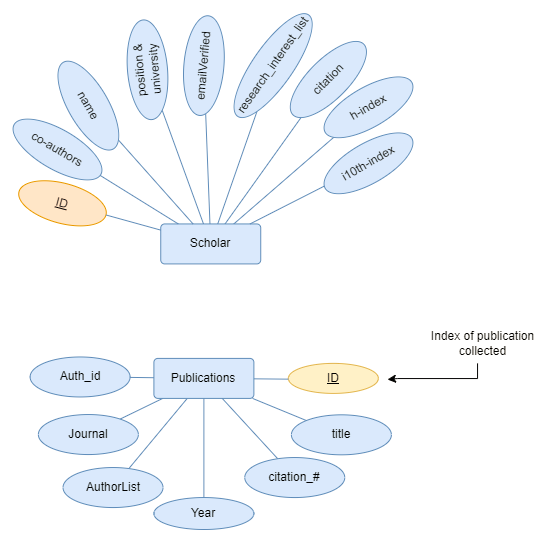

In [10]:
# Remove possible duplicates among scholars total rows
scholars = scholars.drop_duplicates(keep="first")
# remove duplicate IDs usually corrupt IDs
scholars.drop_duplicates(subset=["ID"], keep="first", inplace = True)
# remove csv files errors in IDs
scholars = scholars[~scholars["ID"].isin(["#NAME?", "#VALUE!"])]

C:\Users\moham\AppData\Local\Temp\ipykernel_7248\553167935.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scholars.drop_duplicates(subset=["ID"], keep="first", inplace = True)


In [12]:
# data is cleaned
scholars[scholars["ID"].isin(["#NAME?", "#VALUE!"])]

,name,position & university,emailVerification,research_interest_list,citation,h-index,i10th-index,ID,co_authors


In [13]:
# view the new size of the data
scholars.shape

(10429, 9)

In [15]:
# Remove possible duplicates due to several runs and connections between scholars
publications = publications.drop_duplicates(keep="first")

In [36]:
# view new shape
publications.shape

(1142098, 6)

In [37]:
# explore the dataset
publications.columns

Index(['title', 'citation_#', 'Year', 'authorsList', 'Journal', 'Auth_id'], dtype='object')

In [38]:
# view the columns
scholars.columns

Index(['name', 'position & university', 'emailVerification',
       'research_interest_list', 'citation', 'h-index', ' i10th-index', 'ID',
       'co_authors'],
      dtype='object')

In [39]:
# view samples of the data
publications.sample(6)

,title,citation_#,Year,authorsList,Journal,Auth_id
465283,Combining maximum-entropy and the Mexican hat ...,76.0,2001.0,"P Vielva, RB Barreiro, MP Hobson, E Martínez-G...",Monthly Notices of the Royal Astronomical Soci...,n0SvOVoAAAAJ
457347,The XMM-Newton Deep Survey of the Lockman Hole,NaN,2000.0,"RE Griffiths, T Miyaji, G Hasinger, Y Hashimot...","AAS/High Energy Astrophysics Division# 5 5, 26...",8OG1X14AAAAJ
520126,Trust and authority in scholarly communication...,7.0,2013.0,"C Tenopir, S Allard, K Levine, R Volentine, L ...","Knoxville, TN: University of Tennessee) http:/...",BsE_HcIAAAAJ
764503,A MILP-based restoration planning method for g...,10.0,2021.0,"Y Xie, D Li, Y Xu, Q Wu, M Yin",International Journal of Electrical Power & En...,LLit50EAAAAJ
9200,Fractional factorial design of genetic coding ...,28.0,1999.0,"A Oyama, S Obayashi, K Nakahashi, N Hirose","14th Computational Fluid Dynamics Conference, ...",2zYkWxUAAAAJ
835725,What fraction of the density fluctuations in t...,13.0,2018.0,"SA Walker, JS Sanders, AC Fabian",Monthly Notices of the Royal Astronomical Soci...,lMcHi8sAAAAJ


In [40]:
# view samples of the data
scholars.head(6)

,name,position & university,emailVerification,research_interest_list,citation,h-index,i10th-index,ID,co_authors
1,Mostafa Z. Ali,"Professor of Computer Science, Jordan Universi...",True,"['Artificial Intelligence', 'Deep learning', '...",5994,31,59,jXuvXP0AAAAJ,"['yZNzBU0AAAAJ', 'A3GaEu8AAAAJ', 'q_5xfI0AAAAJ..."
0,Sami Sayadi,Professor at Qatar University,True,"['Environmental Biotechnology', 'Sustainable D...",23632,85,345,0zjyTYoAAAAJ,[]
2,Kaiming He,"Associate Professor, EECS, MIT",True,"['Computer Vision', 'Machine Learning']",557407,68,72,DhtAFkwAAAAJ,"['ALVSZAYAAAAJ', 'W8VIEZgAAAAJ', 'AUhj438AAAAJ..."
3,"R. Prof. P. N. Suganthan, FIEEE'2015, SCI High...","KINDI Center for Computing Research, Qatar Uni...",True,"['Machine Learning(ML)', 'Swarm-Evolutionary C...",73911,119,401,yZNzBU0AAAAJ,"['q_5xfI0AAAAJ', 'L8XYpAwAAAAJ', 'A3GaEu8AAAAJ..."
4,B. Y. Qu,Zhongyuan University of Technology,True,"['Evolutionary computation', 'Multi-modal opti...",14836,50,107,A3GaEu8AAAAJ,"['q_5xfI0AAAAJ', 'yZNzBU0AAAAJ', 'nhL9PHwAAAAJ..."
5,J Liang (梁静),Zhengzhou University,True,"['Evolutionary Computation', 'Benchmark Suite'...",23145,58,138,q_5xfI0AAAAJ,"['A3GaEu8AAAAJ', 'yZNzBU0AAAAJ', '57FULzwAAAAJ..."


### Publication Duplication

The table of publications is read from two sources, from the different author pages, therefore, a duplication exists in all the cells of the <br/>
`'title', 'citation_#', 'Year', 'authorsList', 'Journal','Auth_id'` <br/>
and to eliminate the duplication, we can perform normalization to eliminate the duplication of cells and keep a middle table for scholars and publications.

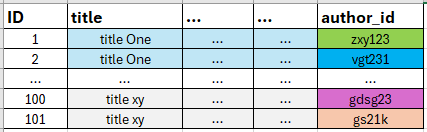

The below fields shown `research_interest_list, co-authors, and journal` can be further expanded into separate tabels to enable a better usage of the data and information. 

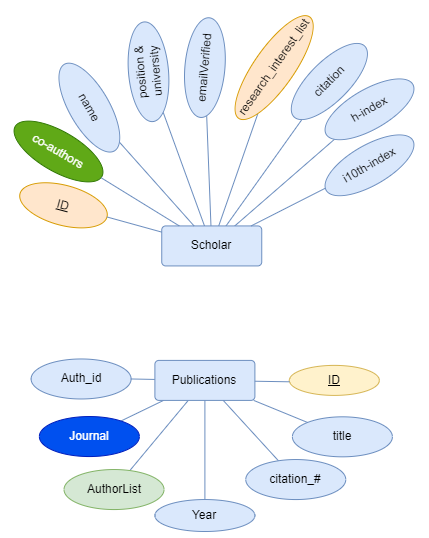

### Design of database 

We need to redesign the database in order to reduce the duplication and utilize the data in the best way possible. <br/>
The following ER daigram schema is suggested for the database.

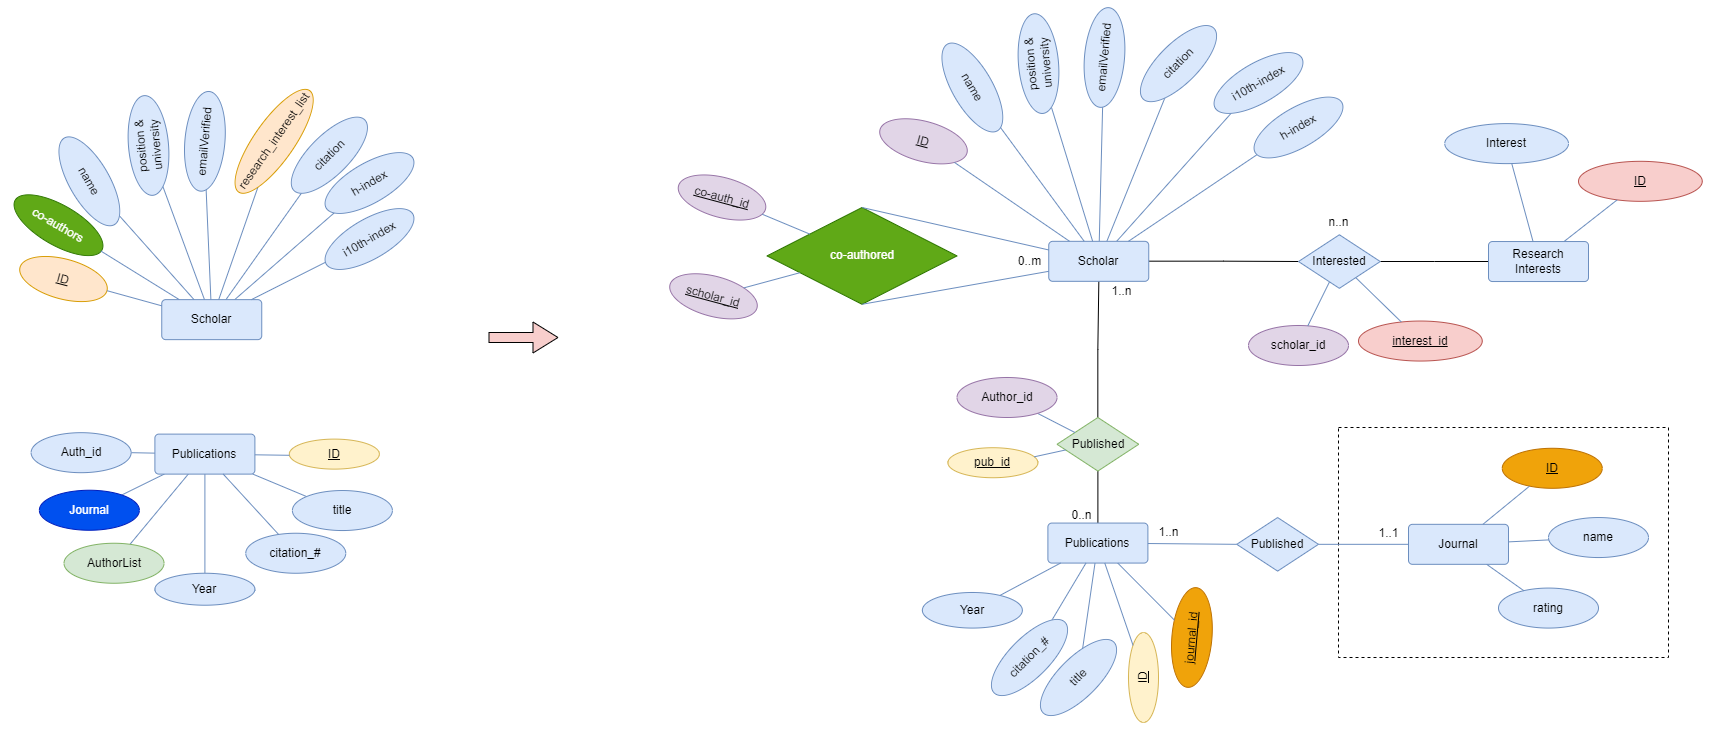

Therefore, the above ERD is mainly as following, in a much clearer image.


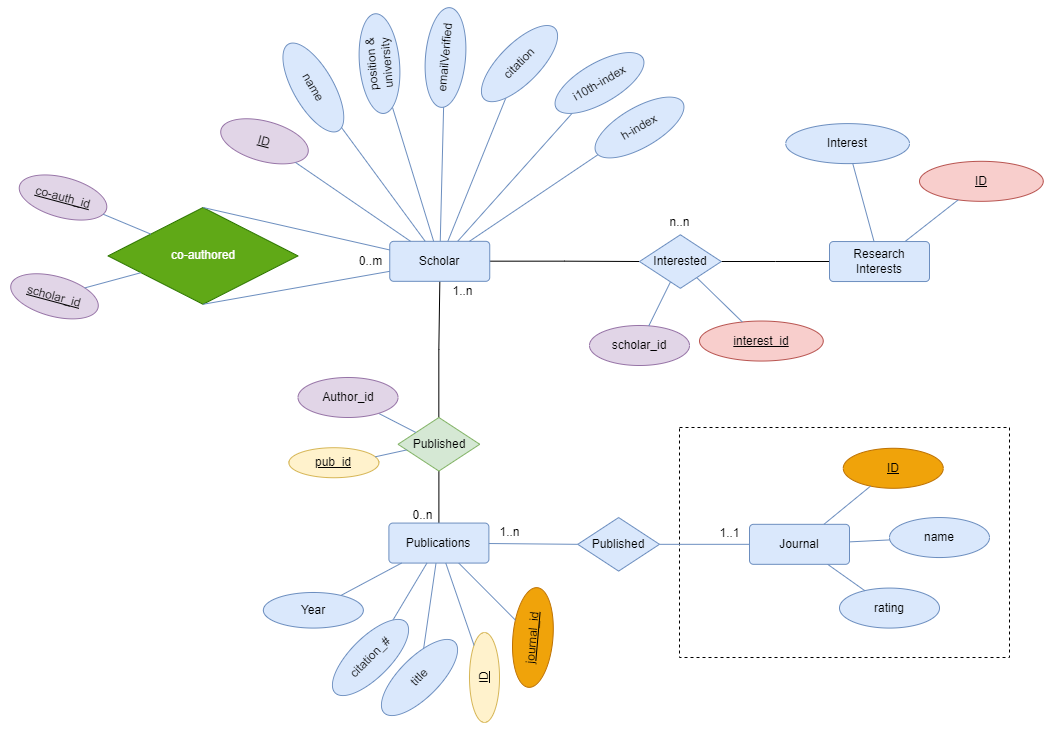

# Creating Database

We must ensure that MySQL server is up and running and the database is created under the name `"google_scholar_db"`

In [4]:
# create an engine for connection
hostname= "localhost"
database= "google_scholar_db"
username= "root"
password= ""

# scholar_db = create_engine("mysql://{user}:{pw}@{host}/{db}".format(host=hostname, db=database, user=username, pw=password))
scholar_db = create_engine(f"mysql://{username}:{password}@{hostname}/{database}")



## Creating tables

In [42]:
# creating needed tables, Scholar tables
scholar_db.execute('''
            CREATE OR REPLACE TABLE scholars(
                ID CHAR(12),
                name VARCHAR(50),
                position_university VARCHAR(50),
                emailVerified tinyint, 
                citation INT(7),
                h_index INT(7),
                i10th_index INT(7),
                PRIMARY KEY (ID)
            )
        ''')

In [43]:
# Creating Journals table
scholar_db.execute('''
            CREATE OR REPLACE TABLE journals(
                ID INT(15),
                name VARCHAR(50),
                rating INT(5),
                PRIMARY KEY(ID) 
            )
        ''')

In [44]:
# Creating Publications table
scholar_db.execute('''
            CREATE OR REPLACE TABLE publications(
                ID INT(15),
                title VARCHAR(50),
                year INT(5),
                citations INT(8), 
                journal_id INT(15),
                scholar_id CHAR(12),
                PRIMARY KEY(ID),
                FOREIGN KEY (scholar_id) REFERENCES scholars(ID),
                FOREIGN KEY (journal_id) REFERENCES journals(ID)
            )
        ''')

In [45]:
# Creating Publications table
scholar_db.execute('''
            CREATE OR REPLACE TABLE research_interests(
                ID INT(15),
                interest VARCHAR(50),
                PRIMARY KEY(ID)
            )
        ''')

In [46]:
# Creating Intermediatory tables "interested" 
scholar_db.execute('''
            CREATE OR REPLACE TABLE interested(
                scholar_id CHAR(12),
                interest_id INT(15),
                FOREIGN KEY (scholar_id) REFERENCES scholars(ID),
                FOREIGN KEY (interest_id) REFERENCES research_interests(ID),
                PRIMARY KEY(scholar_id, interest_id)
            )
        ''')

In [47]:
# creating the co-authors table
scholar_db.execute('''
            CREATE OR REPLACE TABLE co_authors(
                scholar_id CHAR(12),
                co_author_id VARCHAR(15),
                FOREIGN KEY (scholar_id) REFERENCES scholars(ID),
                FOREIGN KEY (co_author_id) REFERENCES scholars(ID),
                PRIMARY KEY(scholar_id, co_author_id)
            )
        ''')

In [48]:
# creating the published table
scholar_db.execute('''
            CREATE OR REPLACE TABLE published(
                author_id VARCHAR(15),
                pub_id INT(15),
                FOREIGN KEY (author_id) REFERENCES scholars(ID),
                FOREIGN KEY (pub_id) REFERENCES publications(ID),
                PRIMARY KEY(author_id, pub_id)
            )
        ''')

## Verify tables creations

In [49]:
# retrieve create tables
for table in scholar_db.execute("SHOW TABLES"):
    print(table)

('co_authors',)
('interested',)
('journals',)
('publications',)
('published',)
('research_interests',)
('scholars',)


# Preparing Data

## Inserting scholars table

In [50]:
# Inserting scholars data: data to be inserted - except research interests and co-authors
scholar_table = scholars[["ID","name","position & university","emailVerification","citation","h-index"," i10th-index"]]

In [51]:
# View the data information types
scholar_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10429 entries, 1 to 16325
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID                     10429 non-null  object
 1   name                   10429 non-null  object
 2   position & university  10429 non-null  object
 3   emailVerification      10429 non-null  bool  
 4   citation               10429 non-null  int64 
 5   h-index                10429 non-null  int64 
 6    i10th-index           10429 non-null  int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 580.5+ KB


In [52]:
# renaming columns to match column names in the DB
new_names = {"position & university":"position_university", "emailVerification":"emailVerified","h-index":"h_index"," i10th-index":"i10th_index" }
scholar_table = scholar_table.rename(columns=new_names)


We use different connection in order to avoid the addition of "- NUMBER" e.g. "-1" at the begining of each user id.

In [56]:
# inserting into the db
scholar_table.to_sql("scholars", scholar_db, if_exists="append", index=False)

10429

In [57]:
for scholar_id in scholar_db.execute("SELECT id FROM scholars LIMIT 10"):
    print(scholar_id)

('-1SNMe8AAAAJ',)
('-2ddEyUAAAAJ',)
('-2gL7U0AAAAJ',)
('-2lv5cwAAAAJ',)
('-2natnkAAAAJ',)
('-3eZMkQAAAAJ',)
('-3ISMGQAAAAJ',)
('-4jE0ywAAAAJ',)
('-4Pt-M8AAAAJ',)
('-4qh9r8AAAAJ',)


## Inserting co-authors table

We need to use the `co-authors` column in the `scholars` entity to connect each user with their co-authors in a separate table. 

In [58]:
# list of sets of each scholar and their co-author
total_co_authors = []

In [59]:
scholars.head(4)

,name,position & university,emailVerification,research_interest_list,citation,h-index,i10th-index,ID,co_authors
1,Mostafa Z. Ali,"Professor of Computer Science, Jordan Universi...",True,"['Artificial Intelligence', 'Deep learning', '...",5994,31,59,jXuvXP0AAAAJ,"['yZNzBU0AAAAJ', 'A3GaEu8AAAAJ', 'q_5xfI0AAAAJ..."
0,Sami Sayadi,Professor at Qatar University,True,"['Environmental Biotechnology', 'Sustainable D...",23632,85,345,0zjyTYoAAAAJ,[]
2,Kaiming He,"Associate Professor, EECS, MIT",True,"['Computer Vision', 'Machine Learning']",557407,68,72,DhtAFkwAAAAJ,"['ALVSZAYAAAAJ', 'W8VIEZgAAAAJ', 'AUhj438AAAAJ..."
3,"R. Prof. P. N. Suganthan, FIEEE'2015, SCI High...","KINDI Center for Computing Research, Qatar Uni...",True,"['Machine Learning(ML)', 'Swarm-Evolutionary C...",73911,119,401,yZNzBU0AAAAJ,"['q_5xfI0AAAAJ', 'L8XYpAwAAAAJ', 'A3GaEu8AAAAJ..."


In [60]:
stored_scholars = list(scholar_table["ID"])
def coAuthors(row):
    '''pass by all scholars and create a pair set of author and their co-authors'''
    scholar_id = row["ID"]
    # conver the string '['asdasa1','adas231']' into a real list
    co_authors = ast.literal_eval( row["co_authors"])

    if len(co_authors):
        for co_author in co_authors:
            # don't add any co-authors not in the scholars table (parent table)
            if co_author not in stored_scholars:  
                continue
            total_co_authors.append( (scholar_id, co_author) )

In [61]:
scholars.apply(coAuthors, axis = 1)

1        None
0        None
2        None
3        None
4        None
         ... 
16311    None
16312    None
16313    None
16314    None
16325    None
Length: 10429, dtype: object

In [62]:
# check co-authors collected
total_co_authors[0:10]

[('jXuvXP0AAAAJ', 'yZNzBU0AAAAJ'),
 ('jXuvXP0AAAAJ', 'A3GaEu8AAAAJ'),
 ('jXuvXP0AAAAJ', 'q_5xfI0AAAAJ'),
 ('jXuvXP0AAAAJ', 'J6lMBuEAAAAJ'),
 ('jXuvXP0AAAAJ', 'fOFSAMkAAAAJ'),
 ('jXuvXP0AAAAJ', 'H4OjUgMAAAAJ'),
 ('jXuvXP0AAAAJ', 'YYULoPQAAAAJ'),
 ('jXuvXP0AAAAJ', 'zVSA3wIAAAAJ'),
 ('jXuvXP0AAAAJ', '7lMW0DYAAAAJ'),
 ('jXuvXP0AAAAJ', 'QXnXFqMAAAAJ')]

In [63]:
# convert to df to store in the db
total_coAuthors = pd.DataFrame( total_co_authors, columns=["scholar_id","co_author_id"] )
total_coAuthors.head(3)

,scholar_id,co_author_id
0,jXuvXP0AAAAJ,yZNzBU0AAAAJ
1,jXuvXP0AAAAJ,A3GaEu8AAAAJ
2,jXuvXP0AAAAJ,q_5xfI0AAAAJ


In [64]:
# store to the database
total_coAuthors.to_sql("co_authors", scholar_db, if_exists="append", index=False)

38853

In [65]:
# delete variables after use to save up memory
del total_coAuthors
del stored_scholars
del scholar_table

In [66]:
# verify addition to the database
for co_authors in scholar_db.execute("SELECT * FROM co_authors LIMIT 10"):
    print(co_authors)

('-2ddEyUAAAAJ', 'DoUxlMEAAAAJ')
('-2lv5cwAAAAJ', 'E_8IRswAAAAJ')
('-2lv5cwAAAAJ', 'ljBOqIEAAAAJ')
('-2lv5cwAAAAJ', 'LTyqhDQAAAAJ')
('-2lv5cwAAAAJ', 'SaCSbeoAAAAJ')
('-3eZMkQAAAAJ', '1YvZ8LAAAAAJ')
('-4jE0ywAAAAJ', 'dpYhOkMAAAAJ')
('-4jE0ywAAAAJ', 'D_OZlCwAAAAJ')
('-4jE0ywAAAAJ', 'eNJxjcwAAAAJ')
('-4qh9r8AAAAJ', '9I0Rb_8AAAAJ')


## Inserting interests table

In [67]:
scholars.head(3)

,name,position & university,emailVerification,research_interest_list,citation,h-index,i10th-index,ID,co_authors
1,Mostafa Z. Ali,"Professor of Computer Science, Jordan Universi...",True,"['Artificial Intelligence', 'Deep learning', '...",5994,31,59,jXuvXP0AAAAJ,"['yZNzBU0AAAAJ', 'A3GaEu8AAAAJ', 'q_5xfI0AAAAJ..."
0,Sami Sayadi,Professor at Qatar University,True,"['Environmental Biotechnology', 'Sustainable D...",23632,85,345,0zjyTYoAAAAJ,[]
2,Kaiming He,"Associate Professor, EECS, MIT",True,"['Computer Vision', 'Machine Learning']",557407,68,72,DhtAFkwAAAAJ,"['ALVSZAYAAAAJ', 'W8VIEZgAAAAJ', 'AUhj438AAAAJ..."


In [68]:
# obtain the total interests in the data
total_interests = []  # to store entire interests, starting at index 1 to use it in the DB later
interested = []  # storing sets of (scholar_id, interest_id)

def scholarInterests(row):
    author_interests = ast.literal_eval( row["research_interest_list"])
    for author_interest in author_interests:
        author_interest = author_interest.lower().strip()
        
        if author_interest in total_interests:
            interested.append( (row["ID"], total_interests.index(author_interest) ) ) 
        else:
            total_interests.append(author_interest.lower().strip() )
            interested.append( (row["ID"], (len(total_interests) - 1) )) 


In [69]:
# call the function to calculate the interests
scholars.apply(scholarInterests, axis = 1)

1        None
0        None
2        None
3        None
4        None
         ... 
16311    None
16312    None
16313    None
16314    None
16325    None
Length: 10429, dtype: object

In [70]:
# the total interests
total_interests[0:3]

['artificial intelligence', 'deep learning', 'evolutionary computation']

In [71]:
# create an interest 
total_interests_df = pd.DataFrame(total_interests, columns=["interest"])
total_interests_df.head(3)

,interest
0,artificial intelligence
1,deep learning
2,evolutionary computation


In [72]:
# store the interests in the database
total_interests_df.index.name = 'ID' # specify the index name to be ID

total_interests_df.to_sql("research_interests", scholar_db, if_exists="append", index=True )

11947

In [73]:
# the interests table
interested[0:3]

[('jXuvXP0AAAAJ', 0), ('jXuvXP0AAAAJ', 1), ('jXuvXP0AAAAJ', 2)]

In [74]:
# store the interests in the database
interested_df = pd.DataFrame(interested, columns=["scholar_id","interest_id"])
interested_df.head(3)

,scholar_id,interest_id
0,jXuvXP0AAAAJ,0
1,jXuvXP0AAAAJ,1
2,jXuvXP0AAAAJ,2


In [75]:
# removing duplicate IDs 
interested_df.drop_duplicates(subset=["scholar_id","interest_id"], keep="first", inplace = True)

In [76]:
# insert table into database
interested_df.to_sql("interested", scholar_db, if_exists="append", index=False)

31102

In [77]:
# verify addition 
for interested_record in scholar_db.execute("SELECT * FROM interested LIMIT 5"):
    print(interested_record)

('-2ddEyUAAAAJ', 6)
('-2ddEyUAAAAJ', 3228)
('-2ddEyUAAAAJ', 5764)
('-2gL7U0AAAAJ', 1387)
('-2gL7U0AAAAJ', 7770)


In [78]:
# delete variables 
del total_interests
del total_interests_df
del interested
del interested_df

## Inserting journals table

In [9]:
# Create the Journals table from the publications
journals = ["conference"]

def create_journals(row):
    # for journals that doesn't exist or has missing data, consider it a conference.
    journal_name = str(row["Journal"]).lower().strip()

    # check for the conference
    if "conference"  in journal_name:
        row["Journal"] = 1
    else:
        if journal_name not in journals:
            journals.append(journal_name)
            row["Journal"] = len(journals)-1
        else:
            row["Journal"] = journals.index(journal_name)

    return row
        

In [10]:
# call function to collect the journals separately
publications = publications.apply(create_journals, axis = 1)

In [11]:
# verify change of journal to an index 
publications.sample(10)

,title,citation_#,Year,authorsList,Journal,Auth_id
776107,IR-derived covering factors for a large sample...,69.0,2013.0,"IG Roseboom, A Lawrence, M Elvis, S Petty, Y S...",252105,4nxqm4sAAAAJ
133798,Evolution and stability of cosmic string loops...,24.0,2009.0,"N Bevis, EJ Copeland, PY Martin, G Niz, A Pour...",310213,KRE0uS8AAAAJ
28509,Deconstructing denoising diffusion models for ...,4.0,2024.0,"X Chen, Z Liu, S Xie, K He",59597,Y2GtJkAAAAAJ
997227,"VECMAtk: a scalable verification, validation a...",19.0,2021.0,"D Groen, H Arabnejad, V Jancauskas, WN Edeling...",297541,_G6FZ6YAAAAJ
19900,One person labels one million images,13.0,2010.0,"J Tang, Q Chen, S Yan, TS Chua, R Jain",1,DNuiPHwAAAAJ
544900,The zurich extragalactic bayesian redshift ana...,334.0,2006.0,"R Feldmann, CM Carollo, C Porciani, SJ Lilly, ...",291630,UOSBjQMAAAAJ
1719,極低温環境下における CFRP 複合材料の高速衝突特性について,1.0,2010.0,久保田怜， 島本聡， 手塚還， 沼田大樹， 安養寺正之， 高山和喜,1095,ULGTp5wAAAAJ
11216,Competition between polar and nonpolar lattice...,NaN,2017.0,"J Gázquez Alabart, M Stengel, R Mishra, M Scig...",260070,nxpDv84AAAAJ
704866,""" Avtomobil yo'llarida geoaxborot tizimlari"", ...",7.0,2019.0,"MM Ergashev, QM Inoyatov, AN Inamov",33,ryuCMMEAAAAJ
130300,Towards flexible solid-state supercapacitors f...,1446.0,2018.0,"DP Dubal, NR Chodankar, DH Kim, P Gomez-Romero",469749,5RaaXvsAAAAJ


In [12]:
# verify creation of journals dataset
journals[:4]

['conference',
 'ieee transactions on computers 33 (11), 1023-1029, 1984',
 'springer science & business media, 2011',
 'ieee journal on robotics and automation 1 (2), 104-113, 1985']

In [13]:
# Store the journals into the database
journals_df = pd.DataFrame(journals, columns=["name"])
# journals_df.index.name= "ID" # convert index into an ID
journals_df.index.name = "ID"

# insert into the table
journals_df.to_sql("journals", scholar_db, if_exists="append", index=True)


676161

In [20]:
# Delete the dataframes
del journals
del journals_df

## Preparing published table

In [40]:
# find the authors per each publication
published = []
def published_author(row):
    if type(row["Auth_id"]) != str:
        for author_id in row["Auth_id"]:
            published.append( (row.name, author_id) )
    else:
        published.append( (row.name, row["Auth_id"]) )


In [41]:
publications

,title,citation_#,Year,authorsList,Journal,Auth_id
0,Practical multiprocessor scheduling algorithms...,758.0,1984.0,"H Kasahara, S Narita","IEEE Transactions on computers 33 (11), 1023-1...",snQhMXcAAAAJ
1,Encyclopedia of parallel computing,317.0,2011.0,D Padua,"Springer Science & Business Media, 2011",snQhMXcAAAAJ
2,Parallel processing of robot-arm control compu...,276.0,1985.0,"H Kasahara, S Narita","IEEE Journal on Robotics and Automation 1 (2),...",snQhMXcAAAAJ
3,Genetic dissection of the circuit for hand dex...,265.0,2012.0,"M Kinoshita, R Matsui, S Kato, T Hasegawa, H K...","Nature 487 (7406), 235-238, 2012",snQhMXcAAAAJ
4,A standard task graph set for fair evaluation ...,240.0,2002.0,"T Tobita, H Kasahara","Journal of Scheduling 5 (5), 379-394, 2002",snQhMXcAAAAJ
...,...,...,...,...,...,...
780979,ОЦЕНКА МУЛЬТИФАКТОРНОГО ВЗАИМОДЕЙСТВИЯ И СОСУД...,NaN,NaN,ГА Розыходжаева,NaN,HoWzcjkAAAAJ
780980,ОПТИМИЗАЦИЯ ДИАГНОСТИЧЕСКИХ ПОДХОДОВ К ОЦЕНКЕ ...,NaN,NaN,"Р УЗБЕКИСТАН, ГА РОЗЫХОДЖАЕВА, АЛ АЛЯВИ",NaN,HoWzcjkAAAAJ
780981,Центральная клиническая больница № 1 Медико-са...,NaN,NaN,ГА Розыходжаева,NaN,HoWzcjkAAAAJ
780982,Атеросклеротическое поражение магистральных ар...,NaN,NaN,ГА Розыходжаева,NaN,HoWzcjkAAAAJ


In [42]:
# apply the function
publications.apply(published_author, axis = 1)

0         None
1         None
2         None
3         None
4         None
          ... 
780979    None
780980    None
780981    None
780982    None
780983    None
Length: 1142098, dtype: object

In [43]:
# verify creation of middle table
published[:4]

[(0, 'snQhMXcAAAAJ'),
 (1, 'snQhMXcAAAAJ'),
 (2, 'snQhMXcAAAAJ'),
 (3, 'snQhMXcAAAAJ')]

## Inserting publications table

We can't remove the duplication based on the columns `["title","citation_#","Year","authorsList","Journal"]` shared between the authors and store authors ids into the `Auth_id` column as it is computationally intensive. Therefore, the database will store duplicate records of publications as shown by the ERD below.

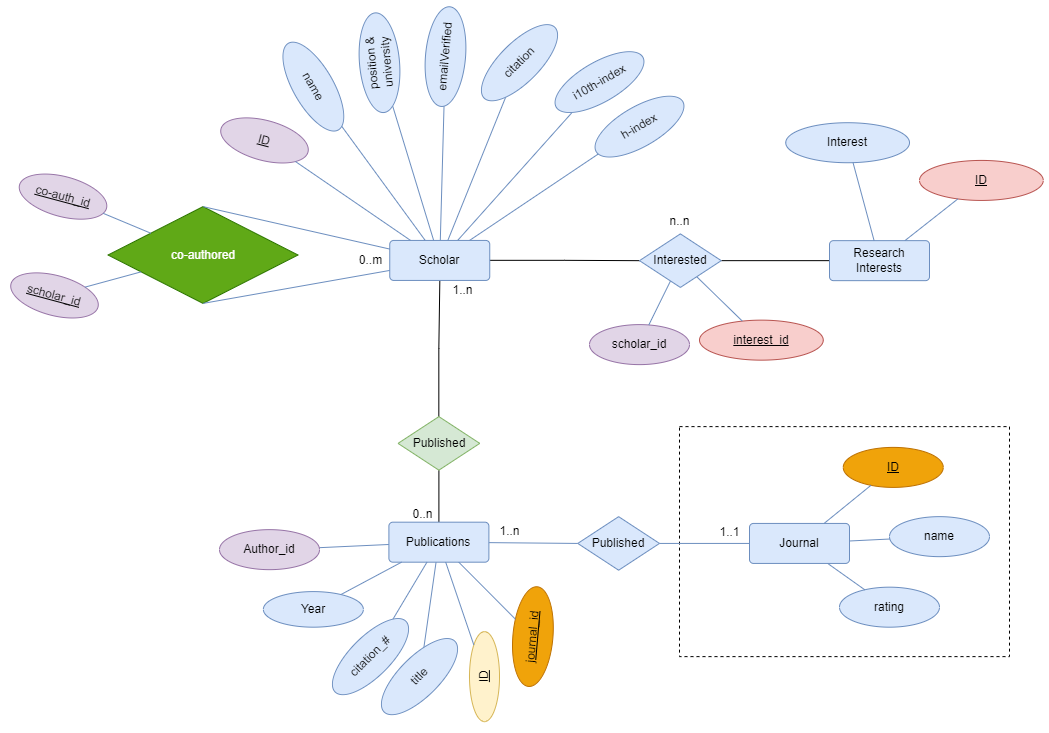

In [31]:
publications.columns

Index(['title', 'citations', 'Year', 'journal_id', 'scholar_id'], dtype='object')

In [32]:
# Preparing the data that will be inserted into the db
publications.rename(columns={"citation_#":"citations","Journal":"journal_id","Auth_id":"scholar_id"}, inplace= True)
publications = publications[["title","citations","Year","journal_id", "scholar_id"]]

# renaming columns to match the database
publications.index.name = "ID"

In [44]:
# storing to the database
publications.to_sql("publications", scholar_db, if_exists="append", index=True)

In [ ]:
# remove data from RAM
del publications

## Inserting published table

In [45]:
# prepare data into a dataframe
published_df = pd.DataFrame(published, columns=["pub_id", "author_id"])
# view dataframe data
published_df.sample(4)

,pub_id,author_id
100093,31597,mwsxrm4AAAAJ
282054,479237,APgaFK0AAAAJ
676347,477514,iUlPKN4AAAAJ
810350,1019114,TQaozfMAAAAJ


In [64]:
# remove any duplicates 
published_df.drop_duplicates(inplace = True)

In [63]:
published_df.shape

(1142085, 2)

In [66]:
# Store to the database
published_df.to_sql("published", scholar_db, if_exists="replace", index=False)

1142085

In [67]:
for rows in scholar_db.execute("SELECT COUNT(*) FROM published "):
    print(rows)

(1142085,)


 $$  Thank You :)  !!!~ $$